# Descriptive Exploration PUF and Counties Aggregate Data

DeSYNPuf, RWJF and BRFSS Aggregate Dataset

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

The file contains aggregated Medicare data from 2008-2010 (DeSYNPuf Synthetic Public Use Files), RWJF County Health Factors and Outcomes Ranking Data from 2010, and BRFSS aggregated 2010 data for 302 out of the 3012 counties.

2960 out of 3012 counties (98%) had a Medicare beneficiary with at least one inpatient or outpatient claim filed between 2008 and 2010. 

In [2]:
medicare_counties = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_BRFSS_MERGED.csv")
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")
medicare_counties.columns=medicare_counties.columns.str.strip()
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 91 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS_STATE_CODE               3012 non-null   float64
 1   FIPS_COUNTY_CODE              3012 non-null   float64
 2   MEAN_AGE                      2960 non-null   float64
 3   MEAN_SEX                      3012 non-null   float64
 4   MEAN_RACE_CD                  3012 non-null   float64
 5   ALZHDMTA_CASES                3012 non-null   float64
 6   CHF_CASES                     3012 non-null   float64
 7   CNCR_CASES                    3012 non-null   float64
 8   COPD_CASES                    3012 non-null   float64
 9   DEPRESSN_CASES                3012 non-null   float64
 10  DIABETES_CASES                3012 non-null   float64
 11  ISCHMCHT_CASES                3012 non-null   float64
 12  OSTEOPRS_CASES                3012 non-null   float64
 13  CHR

Here are the counties with no Medicare claimants for the period.  

(We know they had no claimants, because age was calculated for beneficiaries based on their claim dates, either for inpatient or outpatient.)

Some have high RWJF rankings (closer to 1) and some have low rankings.

A few are part of Metropolitan or Micropolitan Statistical Areas (CBSA)s.

In [3]:
no_claims = medicare_counties[medicare_counties["MEAN_AGE"].isnull()]
nc_summary = no_claims[["STATE", "COUNTY", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
nc_summary.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
2327,South Dakota,Todd,NaN,0.018,0.070
1585,Montana,Roosevelt,NaN,0.023,0.000
1950,North Dakota,Sioux,NaN,0.023,0.000
873,Kansas,Elk,NaN,0.030,0.101
280,Colorado,Saguache,NaN,0.036,0.625
117,Arkansas,Desha,NaN,0.093,0.133
2401,Tennessee,Pickett,NaN,0.095,0.389
2827,Washington,Adams,NaN,0.154,0.436
899,Kansas,Lincoln,NaN,0.212,0.646
2374,Tennessee,Houston,NaN,0.263,0.263


Below, we can see the Health Factors and Outcomes Rank distributions for these "no claims" counties.

We see many counties with no claims that are more highly ranked for both Factors & Outcomes (0.6-0.7), but we also see many counties with very low Factors rankings.  Still, some of these low Factors counties must have higher Outcomes, otherwise we would see the spike at the low end in both graphs.

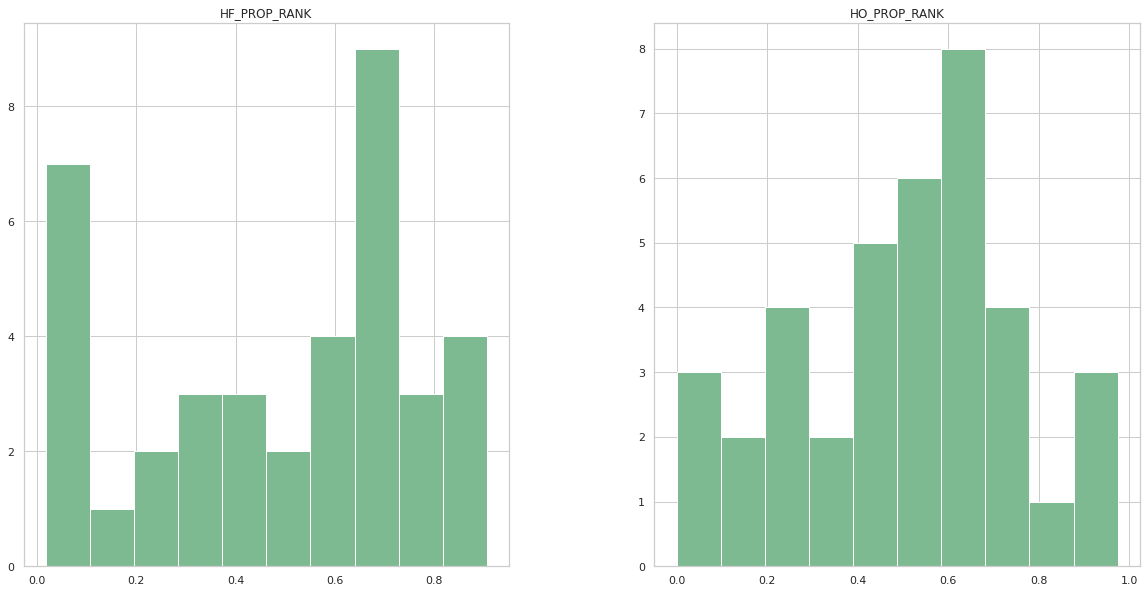

In [4]:
#Dropping NaNs before plotting
nc_summary2 = nc_summary.drop("CBSA_NAME", axis=1).dropna()

sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
nc_summary2.hist("HF_PROP_RANK", ax=axes[0])
nc_summary2.hist("HO_PROP_RANK", ax=axes[1])
plt.show()

## Mean Age, Sex and Race Codes

Mean Age of beneficiaries in a county is self-explanatory.

But Mean Sex and Race Codes? 

Here's my rationale.  Recoding Sex as 0=Female, and 1=Male the mean will show the mean proportion of males to females for the beneficiaries from that county. 

Race codes are organized with white as 1, and minority groups as 2-5, including "other".  The more diverse a county's beneficiary population is, the more it's Mean Race will trend away from 1.

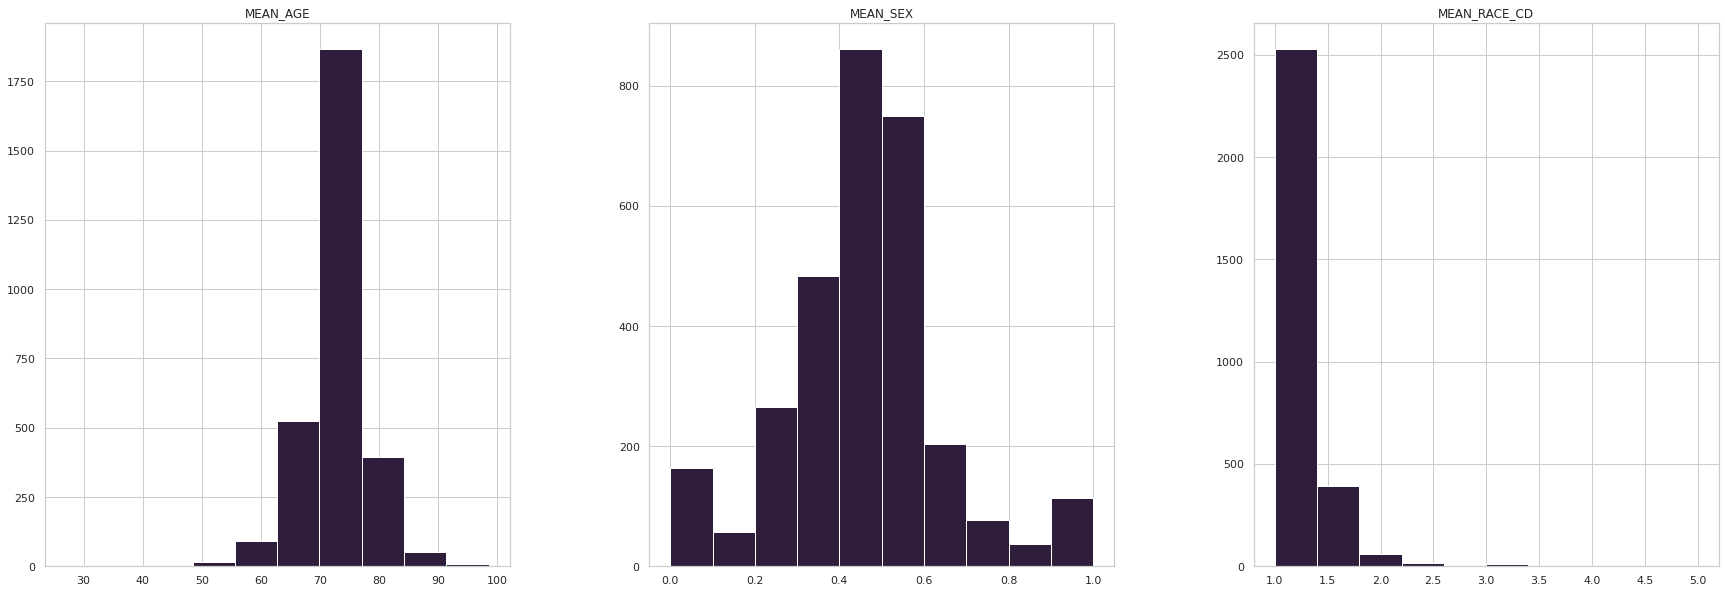

In [5]:
medicare_counties["MEAN_AGE"] = medicare_counties["MEAN_AGE"].round(decimals=1)

sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
medicare_counties.hist("MEAN_AGE", ax=axes[0])
medicare_counties.hist("MEAN_SEX", ax=axes[1])
medicare_counties.hist("MEAN_RACE_CD", ax=axes[2])
plt.show()

Ok, so this is interesting.  We have a lot of counties where mean age is between 70 and 75.  And we have a lot with equal numbers of males and females (leaning slightly females, because people are older).  And we have a lot of white beneficiaries.  This isn't a surprise because we know they access the system more than minorities.

But what are these counties that have mean age between 50 and 65? Or mean RACE CD of 3?  Or mean sex of 0 or 1?

Let's find out.

In [6]:
not_white = medicare_counties[medicare_counties["MEAN_RACE_CD"]>3]
nw = not_white[["STATE", "COUNTY", "MEAN_RACE_CD", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
nw.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,MEAN_RACE_CD,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
259,Colorado,Lake,5.0,NaN,0.286,0.286
320,Florida,Gulf,5.0,NaN,0.328,0.582
2506,Texas,Garza,3.5,NaN,0.376,0.244
2559,Texas,Lipscomb,5.0,NaN,NaN,NaN
2569,Texas,Mason,3.5,NaN,NaN,NaN


Mason, TX is 21% Hispanic.

Lipscomb, TX is also 21% Hispanic, and 13% "Other".

Garza, TX is 37% Hispanic, and 17% "Other".

These are all small towns with populations under 10,000 people and they are not all in southern TX.  My guess is those who scored mean = 5.0 were a few beneficiaries from these rural areas who were all Hispanic.

If counties with beneficiaries with MEAN_RACE_CD > 3 had large Hispanic populations, we'll likely find more diversity clustered between 1.5 and 3.  This turned out to be an interesting variable.

In [7]:
young = medicare_counties[medicare_counties["MEAN_AGE"]<65]
y = young[["STATE", "COUNTY", "MEAN_AGE", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
y.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_AGE,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
150,Arkansas,Phillips,63.3,NaN,0.000,0.000
1565,Montana,Glacier,60.8,NaN,0.000,0.023
42,Alabama,Lowndes,57.8,"Montgomery, AL",0.000,0.045
489,Georgia,Stewart,57.3,NaN,0.000,0.051
2381,Tennessee,Lauderdale,62.5,NaN,0.000,0.105
879,Kansas,Geary,62.1,"Mahattan, KS",0.010,0.081
1380,Mississippi,Humphreys,54.3,NaN,0.012,0.074
974,Kentucky,Clay,64.6,NaN,0.017,0.058
2487,Texas,Dimmit,45.1,NaN,0.023,0.814
2292,South Dakota,Dewey,38.2,NaN,0.035,0.053


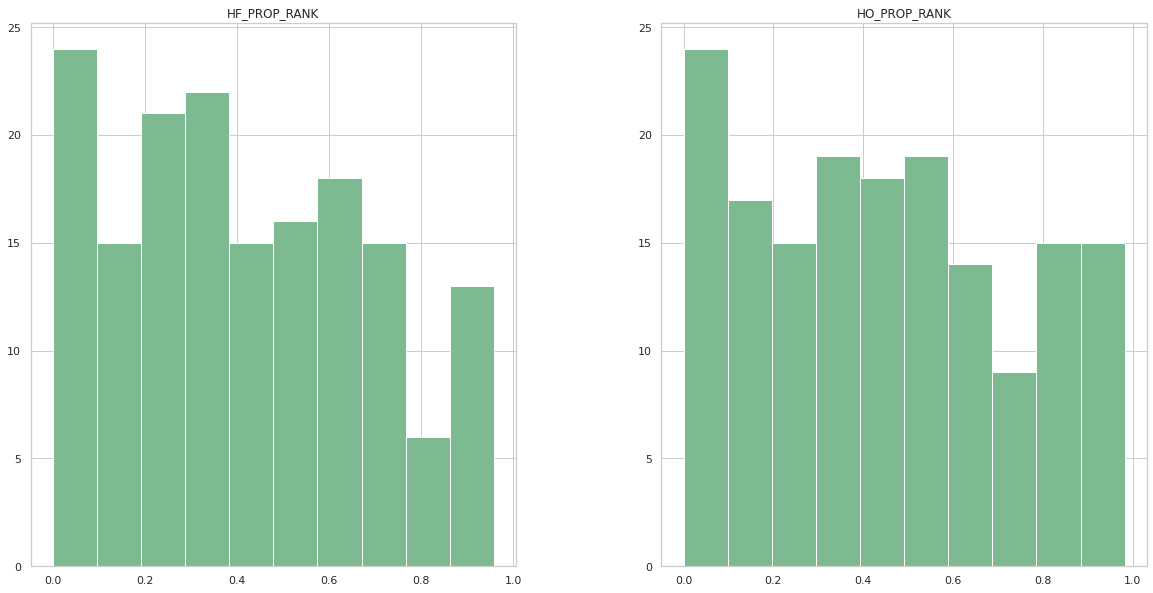

In [8]:
#Dropping NaNs before plotting
y = y.drop("CBSA_NAME", axis=1).dropna()

sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
y.hist("HF_PROP_RANK", ax=axes[0])
y.hist("HO_PROP_RANK", ax=axes[1])
plt.show()

So, many of these counties with beneficiaries whose average age is < 65 have low RWJF rankings (24) but some have higher rankings.  

Where are these counties? 

My guess is they are in VERY SMALL TOWNS, where there might be one or two disabled people accessing care at a young age.

In [9]:
yh = y[(y["HO_PROP_RANK"]>0.8) | (y["HF_PROP_RANK"]>0.85)]
yh = yh[["STATE", "COUNTY", "MEAN_AGE", "HF_PROP_RANK", "HO_PROP_RANK"]]
yh.sort_values(by=["MEAN_AGE"]).head(10)

,STATE,COUNTY,MEAN_AGE,HF_PROP_RANK,HO_PROP_RANK
2618,Texas,Somervell,27.0,0.950,0.819
2487,Texas,Dimmit,45.1,0.023,0.814
1945,North Dakota,Renville,51.4,0.818,0.864
2815,Virginia,Poquoson,52.0,0.939,0.902
233,Colorado,Archuleta,53.8,0.500,0.804
2899,West Virginia,Pendleton,56.2,0.909,0.982
1313,Minnesota,Marshall,57.5,0.153,0.941
1020,Kentucky,Lyon,58.0,0.775,0.850
1381,Mississippi,Itawamba,58.2,0.914,0.667
147,Arkansas,Newton,59.0,0.347,0.933


And that's pretty much it - these are really small places.  

Somervell, TX is an interesting case.  There are 36 people per square mile there.  Also, this tiny county is home to two large nuclear power plants.  

Ok, what about the very low-ranked counties with younger than average beneficiaries? 

In [10]:
yl = y[(y["HO_PROP_RANK"]<0.2) | (y["HF_PROP_RANK"]<0.15)]
yl = yl[["STATE", "COUNTY", "MEAN_AGE", "HF_PROP_RANK", "HO_PROP_RANK"]]
yl.sort_values(by=["MEAN_AGE"]).head(10)

,STATE,COUNTY,MEAN_AGE,HF_PROP_RANK,HO_PROP_RANK
2292,South Dakota,Dewey,38.2,0.035,0.053
2605,Texas,Robertson,43.2,0.054,0.054
2487,Texas,Dimmit,45.1,0.023,0.814
2103,Oklahoma,Pawnee,50.0,0.143,0.390
1380,Mississippi,Humphreys,54.3,0.012,0.074
2799,Virginia,Emporia,54.9,0.061,0.008
1523,Missouri,Reynolds,55.9,0.078,0.026
489,Georgia,Stewart,57.3,0.000,0.051
1634,Nebraska,Hitchcock,57.7,0.053,0.187
42,Alabama,Lowndes,57.8,0.000,0.045


These are small places too, but they are also places with big challenges.

Almost all of Dewey County, SD lies in the Cheyenne River Indian Reservation. The balance of the county, along its extreme northern county line, lies in the Standing Rock Indian Reservation. It is one of five South Dakota counties that are contained within Indian reservations. 

Based on 2010 Census figures, the median age in Dewey County is 30, the population is 74.9% American Indian, and 20.5% of families and 30.5% of the population were below the US federal poverty line.

Alright, last but not least - where are these places where almost every beneficiary is either female or male?

In [11]:
female = medicare_counties[medicare_counties["MEAN_SEX"]<0.1]
f = female[["STATE", "COUNTY", "MEAN_SEX", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
f.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_SEX,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
2957,Wisconsin,Menominee,0.000000,NaN,0.000,0.000
564,Illinois,Alexander,0.000000,"Cape Girardeau-Jackson, MO-IL",0.000,0.010
1947,North Dakota,Rolette,0.000000,NaN,0.000,0.045
1511,Missouri,Pemiscot,0.000000,NaN,0.009,0.000
1950,North Dakota,Sioux,0.000000,NaN,0.023,0.000
2487,Texas,Dimmit,0.000000,NaN,0.023,0.814
2183,Pennsylvania,Forest,0.000000,NaN,0.030,0.209
1641,Nebraska,Kimball,0.000000,NaN,0.040,0.053
2851,Washington,Pacific,0.090909,NaN,0.051,0.231
2287,South Dakota,Corson,0.000000,NaN,0.053,0.018


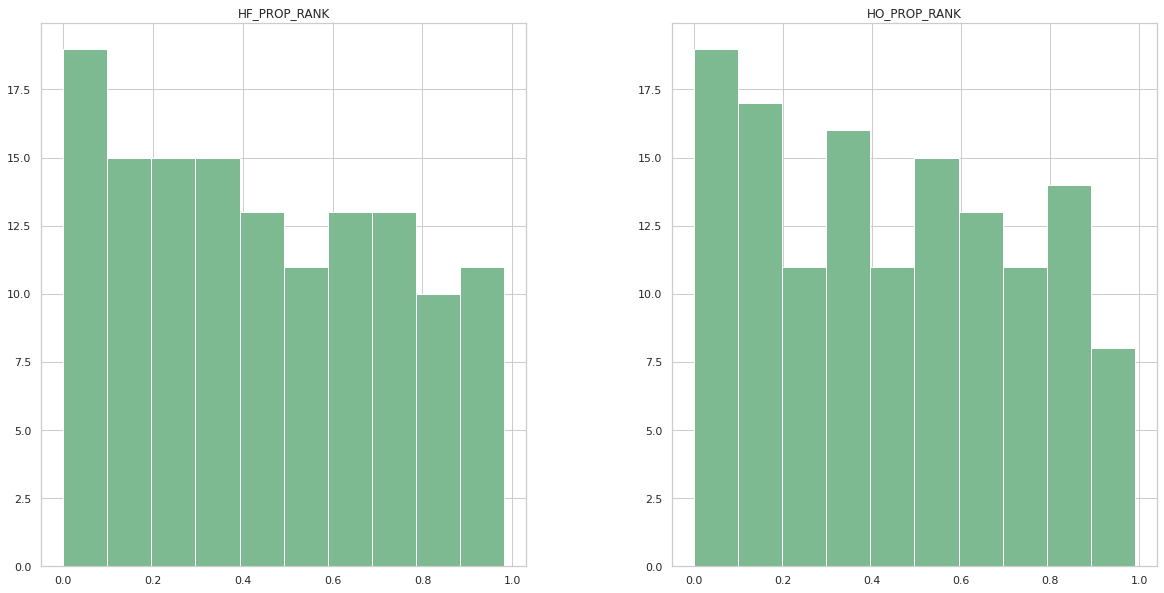

In [12]:
#Dropping NaNs before plotting
f = f.drop("CBSA_NAME", axis=1).dropna()

sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
f.hist("HF_PROP_RANK", ax=axes[0])
f.hist("HO_PROP_RANK", ax=axes[1])
plt.show()

There are some interesting things going on in these predominantly female counties, and they're not all the same.

For example, in Menominee, WI, not only is it a small place but about 40% of the population is under 18.  So, the few older people who are there who are using Medicare must all be female.

Then there's Corson, SD which is another heavily American Indian area on a different Reservation.  This is a very poor area where people do not live very long.  So, those who are still around who are accessing Medicare are females.

In [13]:
male = medicare_counties[medicare_counties["MEAN_SEX"]>0.9]
m = male[["STATE", "COUNTY", "MEAN_SEX", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
m.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_SEX,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
1681,Nevada,Mineral,1.0,NaN,0.000,0.000
2836,Washington,Ferry,1.0,NaN,0.000,0.000
1667,Nebraska,Thurston,1.0,NaN,0.000,0.027
1616,Nebraska,Dakota,1.0,"Sioux City, IA-NE-SD",0.013,0.267
2327,South Dakota,Todd,1.0,NaN,0.018,0.070
1585,Montana,Roosevelt,1.0,NaN,0.023,0.000
873,Kansas,Elk,1.0,NaN,0.030,0.101
1912,North Dakota,Benson,1.0,NaN,0.045,0.023
81,Alaska,Yukon-Koyukuk,1.0,NaN,0.045,0.136
2605,Texas,Robertson,1.0,"College Station-Bryan, TX",0.054,0.054


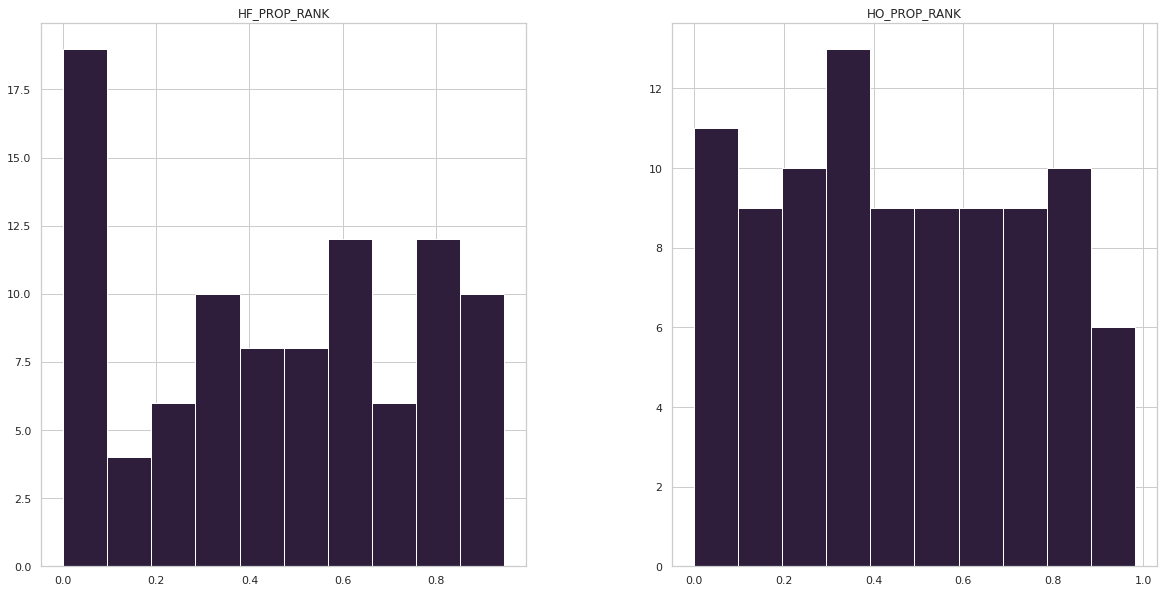

In [14]:
#Dropping NaNs before plotting
m = m.drop("CBSA_NAME", axis=1).dropna()

sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
m.hist("HF_PROP_RANK", ax=axes[0])
m.hist("HO_PROP_RANK", ax=axes[1])
plt.show()

Some of these male-heavy counties were male heavy for a reason, such as Yukon–Koyukuk, AK where life is rugged and there are 123 men for every 100 women over age 18 and the median age is 30.

Others were just small places with a likely small number of beneficiaries to average.

**Just like all the other "extreme" counties in this brief exploration, these are other areas that represent outliers in the US.  If we want to learn interesting things, we can look here.  If we want to learn about what goes on for "average" people in the US - we can probably ignore these outliers.**



## Case Counts

I carefully ensured that for each beneficiary there was only one possible positive case recorded for each chronic condition, so I could sum these the total number of cases of a particular condition among beneficiaries in a particular county.  

Let's see how these case counts correlate with the County Health Rankings, Total Costs and Stay Information, but first, let's face the fact - this is zero-heavy data.  We're glad about this, but if we don't do anything about it, outliers will skew correlation results.

Since we are interested in super-utilizers, let's try to identify those counties with the highest MEAN_INP_STAY and highest total costs (ALLCOSTS).

In [15]:
medicare_counties["ESRD_CASES"].value_counts(normalize=True)


0.0      0.192563
1.0      0.183267
2.0      0.130146
3.0      0.102590
4.0      0.070717
           ...   
147.0    0.000332
369.0    0.000332
65.0     0.000332
100.0    0.000332
115.0    0.000332
Name: ESRD_CASES, Length: 101, dtype: float64

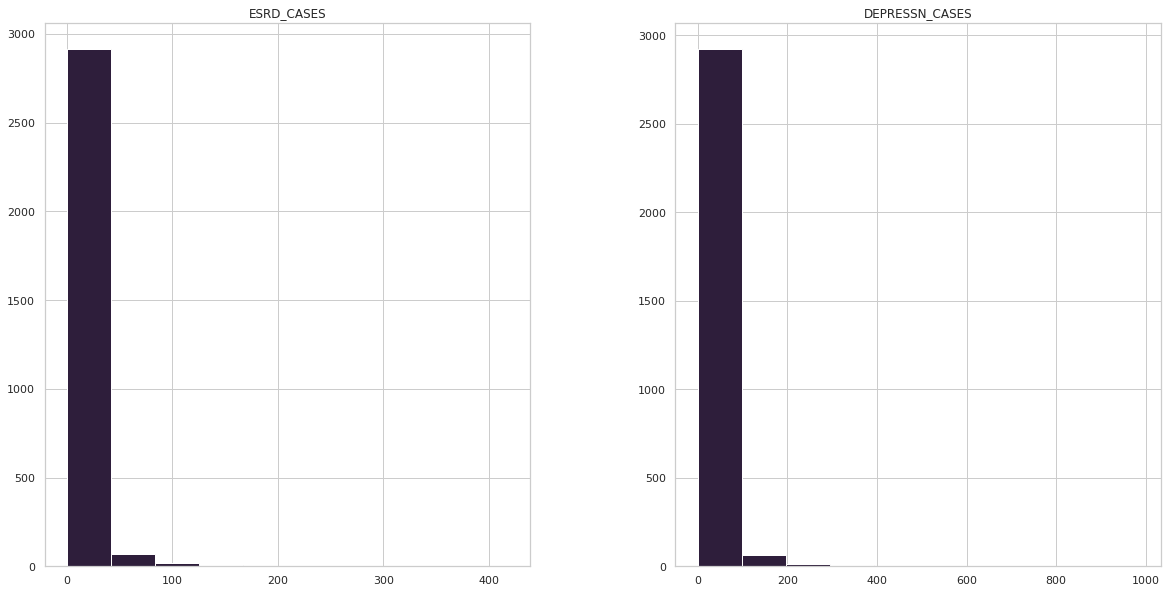

In [16]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("ESRD_CASES", ax=axes[0])
medicare_counties.hist("DEPRESSN_CASES", ax=axes[1])
plt.show()

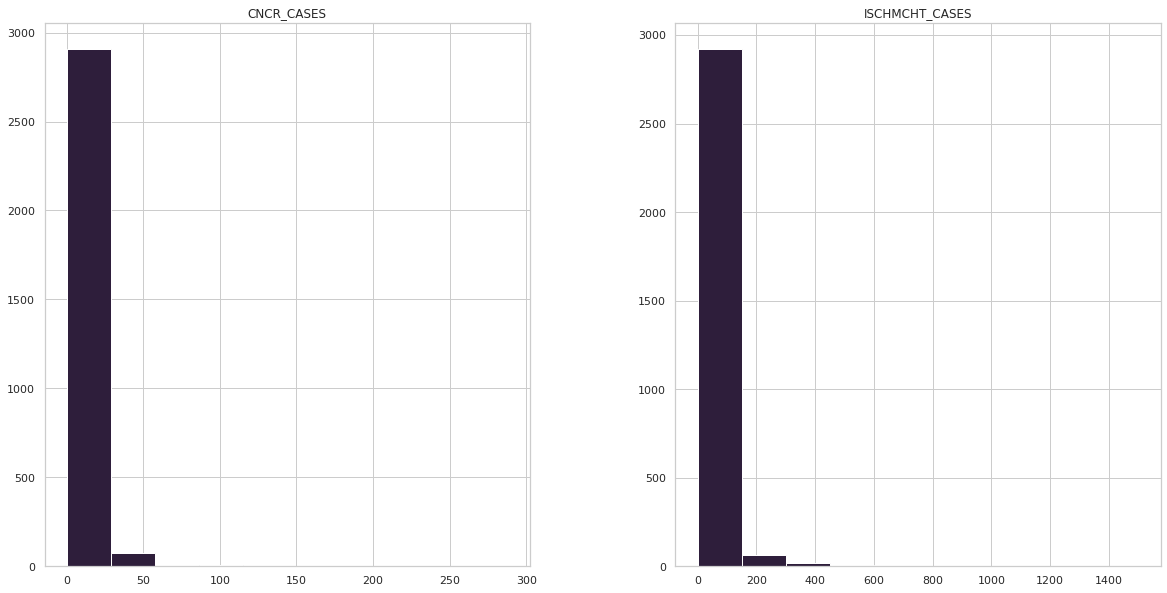

In [17]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("CNCR_CASES", ax=axes[0])
medicare_counties.hist("ISCHMCHT_CASES", ax=axes[1])
plt.show()

In [18]:
medicare_counties["ALLCOSTS"].value_counts(normalize=True)

0.000000e+00    0.017264
6.000000e+01    0.000664
2.000000e+01    0.000664
1.100000e+03    0.000664
3.443333e+03    0.000664
                  ...   
4.314300e+05    0.000332
1.549667e+04    0.000332
6.520000e+03    0.000332
1.221904e+06    0.000332
2.442160e+05    0.000332
Name: ALLCOSTS, Length: 2947, dtype: float64

In [19]:
medicare_counties["TOTAL_INP_DAYS"].value_counts(normalize=True)

0.000000      0.100266
1.000000      0.018924
2.000000      0.015936
1.333333      0.014608
3.000000      0.014276
                ...   
20.500000     0.000332
212.500000    0.000332
16.500000     0.000332
103.666667    0.000332
368.333333    0.000332
Name: TOTAL_INP_DAYS, Length: 790, dtype: float64

In [20]:
# Remove the outliers (we can explore them more later)
cc_reasonable = medicare_counties[(medicare_counties["ALLCOSTS"]<10000000) & (medicare_counties["TOTAL_INP_DAYS"]<2000) & (medicare_counties["TOTAL_CC_CASES"]<600) & (medicare_counties["TOTAL_CC_CASES"]>100)]


# Subset to higher utilzers
cc_case_counties = cc_reasonable[(cc_reasonable["ALLCOSTS"]>1000000) | (cc_reasonable["TOTAL_INP_DAYS"]>500)]
cc_case_counties.shape

(361, 91)

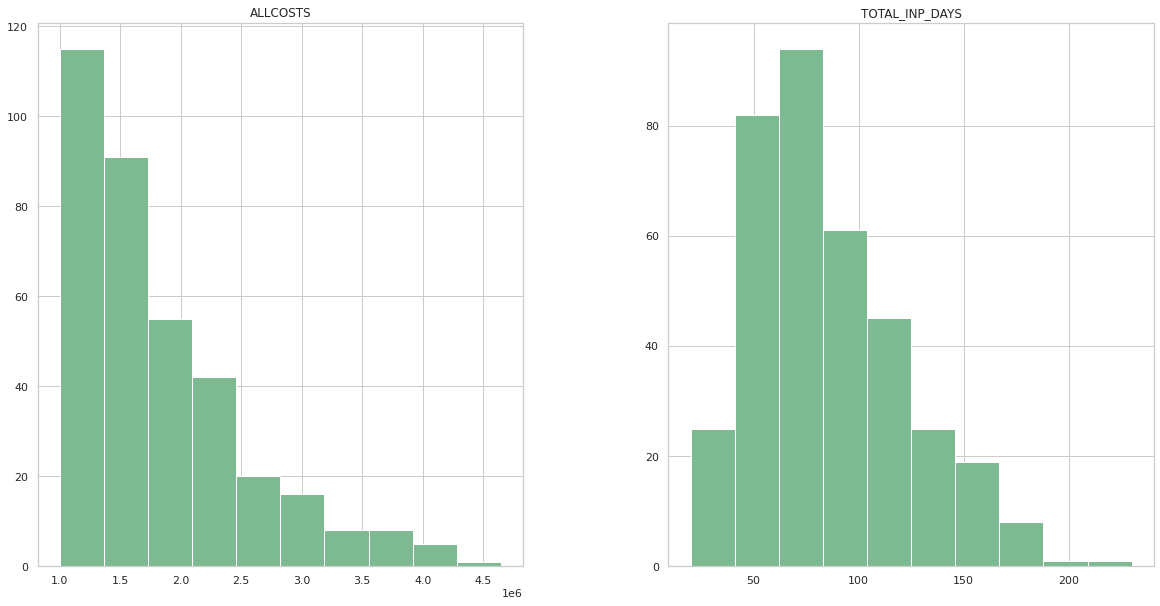

In [21]:
sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
cc_case_counties.hist("ALLCOSTS", ax=axes[0])
cc_case_counties.hist("TOTAL_INP_DAYS", ax=axes[1])
plt.show()

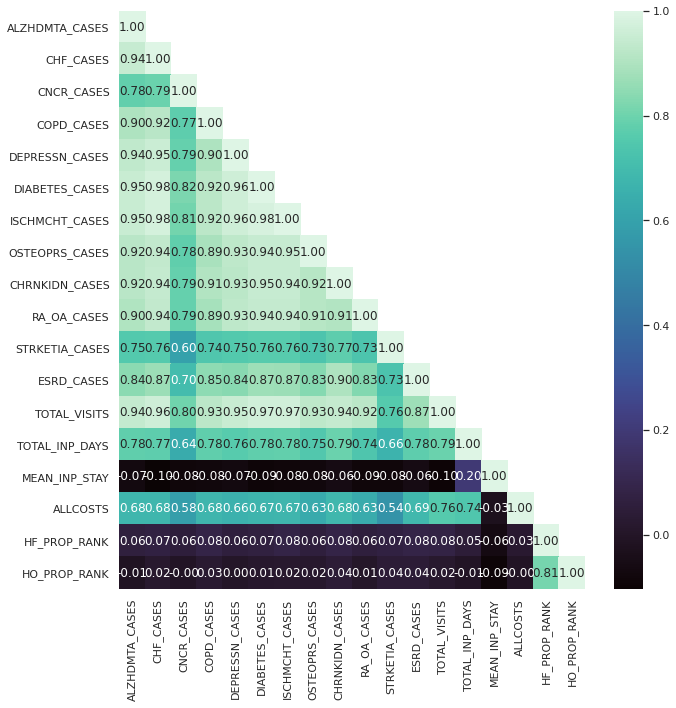

In [22]:
conditions = cc_case_counties[["ALZHDMTA_CASES", "CHF_CASES", "CNCR_CASES", "COPD_CASES", "DEPRESSN_CASES", 
                                "DIABETES_CASES", "ISCHMCHT_CASES", "OSTEOPRS_CASES", "CHRNKIDN_CASES", 
                                "RA_OA_CASES", "STRKETIA_CASES", "ESRD_CASES", "TOTAL_VISITS", "TOTAL_INP_DAYS",
                               "MEAN_INP_STAY", "ALLCOSTS", "HF_PROP_RANK", "HO_PROP_RANK"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.tight_layout()
fig.savefig("counties_cases_heatmap.png")

In [23]:
cc_case_counties["TOTAL_CC_CASES"].describe()

count    361.000000
mean     299.307479
std      124.538893
min      103.000000
25%      196.000000
50%      280.000000
75%      384.000000
max      599.000000
Name: TOTAL_CC_CASES, dtype: float64

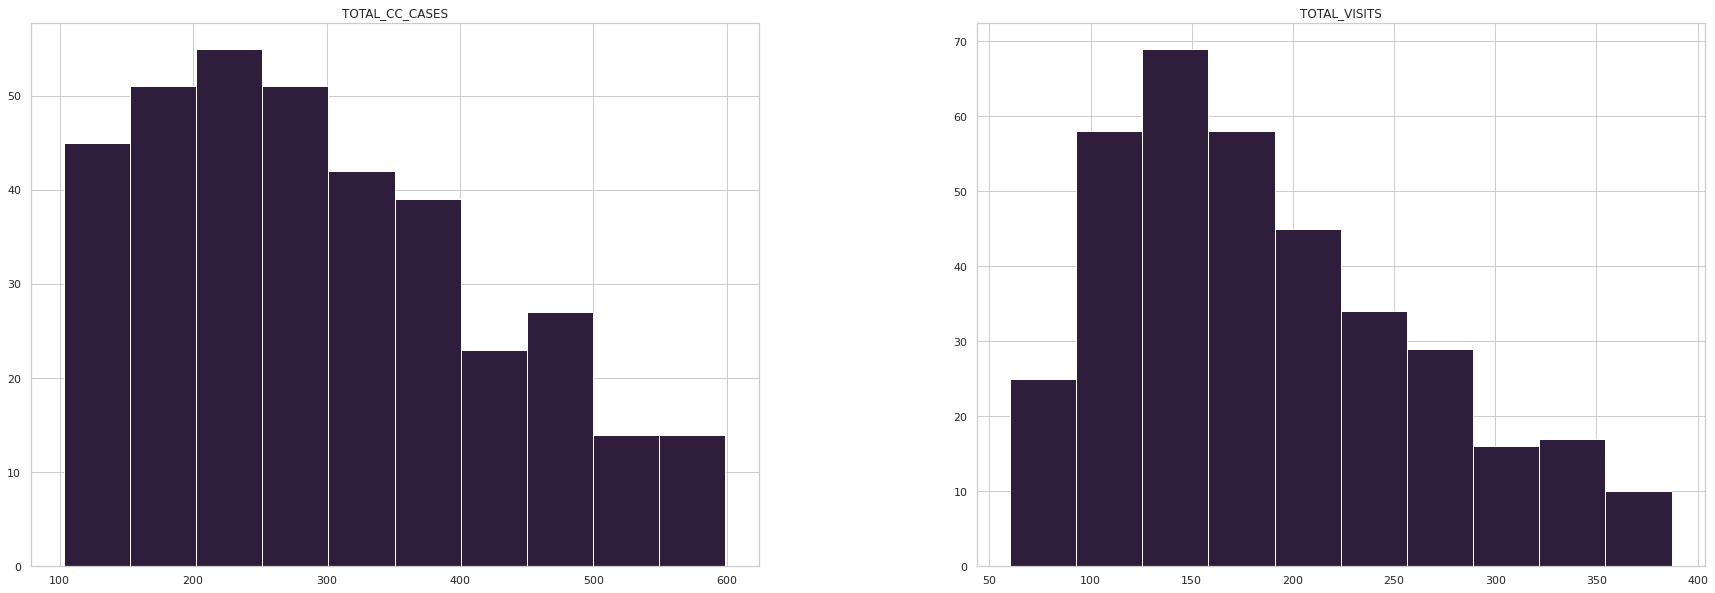

In [24]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
cc_case_counties.hist("TOTAL_CC_CASES", ax=axes[0])
cc_case_counties.hist("TOTAL_VISITS", ax=axes[1])
plt.show()

So, these are our 361 Super-Utilizers (but not the Super-Duper Outliers; we can tackle them later).


In [25]:
cc = cc_case_counties[["STATE", "COUNTY", "MEAN_SEX", "MEAN_AGE", "MEAN_RACE_CD", "CBSA_NAME", 
                       "HF_PROP_RANK", "HO_PROP_RANK", "ALLCOSTS", "TOTAL_INP_DAYS", 
                       "DrinksPerDayWMean", "SmokerWMean"]]

cc_super_states = cc.groupby(["STATE", "COUNTY"]).aggregate({"ALLCOSTS":"sum", "TOTAL_INP_DAYS":"sum", 
                                                            "HF_PROP_RANK":"mean", "HO_PROP_RANK":"mean"})
cc_super_states.sort_values(by="ALLCOSTS", ascending=False).head(20)

,,ALLCOSTS,TOTAL_INP_DAYS,HF_PROP_RANK,HO_PROP_RANK
STATE,COUNTY,,,,
Florida,St. Lucie,4.644060e+06,176.166667,0.284,0.552
Wisconsin,Waukesha,4.262453e+06,186.333333,0.958,0.944
Michigan,Ingham,4.199624e+06,181.000000,0.634,0.610
Wisconsin,Dane,4.184951e+06,160.333333,0.972,0.861
Louisiana,East Baton Rouge,4.093319e+06,230.000000,0.953,0.703
Ohio,Mahoning,4.083845e+06,162.000000,0.375,0.148
Pennsylvania,Lehigh,3.910193e+06,182.000000,0.746,0.716
Texas,Galveston,3.883523e+06,114.333333,0.561,0.471
Pennsylvania,Chester,3.760205e+06,166.333333,0.985,0.985


Just looking at the top 20 states and counties for utilization, grouped above, I would say we are onto something thinking that we are not spending on care for those who need it most.

The average Factors and Outcomes ranks for these states are moderate, and some are even far above-average!

One conclusion I have come to is, I need to go back and include the total count of beneficiaries averaged to create a given county's data.  Perhaps, we even need to eliminate those with too few beneficiaries?

We can decide once we see the distribution of the representation of beneficiaries across the counties.